In [70]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

%matplotlib inline

from matplotlib import gridspec
from NFW_Z import NFW_Z

In [71]:
bin_size = 10 # in kpc
starting_radius = 100 # in kpc

In [72]:
MilkyWay = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/Milky Way/742935_dm_properties_TNGv2.txt")

In [73]:
dx_MilkyWay = MilkyWay[:,0] - 33960.34 # in kpc, shifted to the halo's center of mass
dy_MilkyWay = MilkyWay[:,1] - 70655.805 # in kpc, shifted to the halo's center of mass
dz_MilkyWay = MilkyWay[:,2] - 2442.741 # in kpc, shifted to the halo's center of mass

r_MilkyWay = np.sqrt(np.power(dx_MilkyWay, 2) + np.power(dy_MilkyWay, 2) + np.power(dz_MilkyWay, 2))
# max: 338.2564261527931 kpc, closest to 340 kpc

rad_array_MilkyWay = np.arange(starting_radius, 340, bin_size) # unit: kpc

In [74]:
density_profile_MilkyWay = np.zeros(np.size(rad_array_MilkyWay))
i = 0
for radius_value in rad_array_MilkyWay:
    particles = np.where((r_MilkyWay > radius_value) & (r_MilkyWay < (radius_value + bin_size)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + bin_size)**3 - radius_value**3)
    density_profile_MilkyWay[i] = how_many_particles / shell_volume * 6.3e6
    i += 1

In [75]:
mass_profile_MilkyWay = np.zeros(np.size(rad_array_MilkyWay))
h = 0
for radius_value in rad_array_MilkyWay:
    particles = np.where((r_MilkyWay < (radius_value + bin_size)))
    how_many_particles = np.size(particles)
    mass_profile_MilkyWay[h] = how_many_particles * 6.3e6
    h += 1

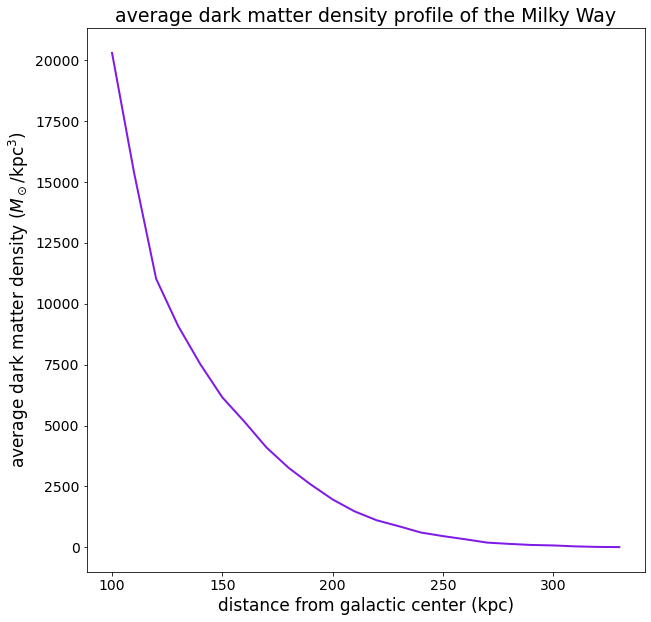

In [76]:
fig, ax = plt.subplots(figsize=[10, 10])
plt.plot(rad_array_MilkyWay, density_profile_MilkyWay, color=(0.5, 0.1, 0.9, 1), linewidth=2, \
         label="average density profile")
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('average dark matter density ($M_\odot$/kpc$^3$)', fontsize=17) # using LATEX here!
plt.title('average dark matter density profile of the Milky Way', loc='center', fontsize=19)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()